In [1]:
#load the dataset from data folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import os
import sys

#load the dataset
def load_data():
    #load the dataset
    data = pd.read_pickle('data/dataset.pkl')
    return data

#display the first 5 rows of the dataset
def display_data(data):
    print(data.head())

#display the shape of the dataset
def display_shape(data):
    print(data.shape)

#display the columns of the dataset
def display_columns(data):
    print(data.columns)

#display the info of the dataset
def display_info(data):
    print(data.info())

#display the summary of the dataset
def display_summary(data):
    print(data.describe())

#display the missing values in the dataset
def display_missing_values(data):
    print(data.isnull().sum())

CSEDMdata = load_data()
# display_data(data)
# display_shape(data)
# display_columns(data)
display_info(CSEDMdata)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488968 entries, 0 to 488967
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   problemID              488968 non-null  object 
 1   problemDescription     488968 non-null  object 
 2   studentID_1            488968 non-null  object 
 3   test_case_verdict_i_1  488968 non-null  object 
 4   codeID_i_1             488968 non-null  object 
 5   code_i_1               488968 non-null  object 
 6   score_i_1              488968 non-null  float64
 7   score_calc_i_1         488968 non-null  float64
 8   test_case_verdict_j_1  488968 non-null  object 
 9   codeID_j_1             488968 non-null  object 
 10  code_j_1               488968 non-null  object 
 11  score_j_1              488968 non-null  float64
 12  score_calc_j_1         488968 non-null  float64
 13  studentID_2            488968 non-null  object 
 14  test_case_verdict_i_2  488968 non-nu

In [2]:
from sentence_transformers import SentenceTransformer, SentenceTransformerTrainer, losses
import yaml
import hydra
# with open('configs_cer.yaml', 'r') as file:
#     config = yaml.safe_load(file)
# print(config['model_name'])

import hydra
from omegaconf import OmegaConf

# Initialize the configuration without using @hydra.main
def load_config():
    # Initialize Hydra manually
    hydra.initialize(config_path=".")

    # Load the config file (config.yaml)
    cfg = hydra.compose(config_name="configs_cer")

    # Print or return the configuration
    print(OmegaConf.to_yaml(cfg))  # Pretty print the config
    return cfg

config = load_config()

/scratch/login/ipykernel_1742400/372013867.py:14: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  hydra.initialize(config_path=".")


seed: 0
exp_name: cer
use_neptune: true
save_model: false
testing: false
testing_size: 16
neptune_project: hhjami/Code-Edit-Representation
log_train_every_itr: 100
model_save_dir: checkpoints
use_cuda: true
verbose: true
data_path: data
test_size: 0.2
max_len: 200
true_false_ratio: 1
model_inp_dim: 1024
model_name: Salesforce/codet5-large
epochs: 50
batch_size: 2
lr: 1.0e-09
lr_pretrained_encoder: 1.0e-08
lr_fc_edit_encoder: 1.0e-05
lr_fc_classifier: 1.0e-05
use_scheduler: true
warmup_ratio: 0.1
loss_fn: ContrastiveLoss
margin: 0.27
accumulation_steps: 1



In [3]:
from model import CustomCERModel
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')  
print(device)  
model = CustomCERModel(configs=config, device=device)

cpu


: 

In [ ]:
import matplotlib.pyplot as plt
import torch

# Data provided
labels = torch.tensor([1, 0, 1, 1, 0, 1, 0, 1, 1])
AB_cosine_similarities = [
    torch.tensor([0.6881, 0.3574, 0.4865, 0.4653, 0.8867, 0.7492, 0.9219, 0.2820, 0.4474]),
    torch.tensor([0.7332, 0.5045, -0.0037, 0.4531, 0.8295, 0.6964, 0.8824, 0.6375, 0.0569]),
    torch.tensor([0.7164, 0.0561, 0.2616, 0.6586, 0.8565, 0.8073, 0.8745, 0.6175, -0.0522]),
    torch.tensor([0.7837, -0.2010, 0.4603, 0.6059, 0.8374, 0.8044, 0.9077, 0.6875, 0.3232]),
    torch.tensor([0.7577, 0.1216, 0.3400, 0.5099, 0.8727, 0.7566, 0.9172, 0.7558, 0.0677]),
    torch.tensor([0.8581, 0.0865, -0.0914, 0.6339, 0.8928, 0.8287, 0.9217, 0.5610, 0.1923]),
    torch.tensor([0.7801, -0.1894, 0.3952, 0.5669, 0.8789, 0.8051, 0.9146, 0.6495, -0.4297]),
    torch.tensor([0.7719, 0.1115, 0.5210, 0.3800, 0.8258, 0.5258, 0.9056, 0.6385, -0.2323]),
    torch.tensor([0.6859, 0.0128, 0.0218, 0.6138, 0.8776, 0.6552, 0.9331, 0.6885, 0.0428]),
    torch.tensor([0.8046, -0.2560, 0.1905, 0.1647, 0.8836, 0.7418, 0.9228, 0.6923, 0.0132])
]

# Plot the AB cosine similarities
fig, ax = plt.subplots(figsize=(10, 6))

for i, AB_cos_sim in enumerate(AB_cosine_similarities):
    ax.plot(AB_cos_sim.cpu().numpy(), label=f'Batch {i+1}')

# Add label information as text markers on the graph
for i, AB_cos_sim in enumerate(AB_cosine_similarities):
    for j, value in enumerate(AB_cos_sim):
        ax.text(j, value, f'{labels[j].item()}', fontsize=8, ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('AB Cosine Similarity')
ax.set_title('AB Cosine Similarities Across Batches')
ax.legend()

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [12]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, RobertaTokenizer

# tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
# model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")
modelName = 'Salesforce/codet5-large'
tokenizer = RobertaTokenizer.from_pretrained(modelName)
model = T5ForConditionalGeneration.from_pretrained(modelName)


# input_text = "translate English to German: How old are you?"
# input_text = "Write a python code to find the factorial of a number."
# input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# outputs = model.generate(input_ids)
# print(tokenizer.decode(outputs[0]))

# Prepare the input
code = "def hello_world():\n\tprint('Hello, world!')"
# input_tokenized = tokenizer.encode(code, return_tensors='pt')

# # Get the embeddings
# # outputs = model(input_tokenized)
# outputs = model(input_tokenized, decoder_input_ids=input_tokenized)
# # embeddings = outputs.last_hidden_state

# print(outputs.shape)

inputs = tokenizer(code, return_tensors="pt", padding=True, truncation=True)
outputs = model.encoder(**inputs)
embeddings = outputs.last_hidden_state
# embeddings = torch.mean(embeddings, dim=1)
print(embeddings.shape)


torch.Size([1, 16, 1024])


In [ ]:
from transformers import T5Tokenizer, T5Model, RobertaTokenizer

# Load the model and tokenizer
# model = T5Model.from_pretrained('t5-base')
# tokenizer = T5Tokenizer.from_pretrained('t5-base')#, legacy=False)
# model = T5Model.from_pretrained('t5-large')
# tokenizer = T5Tokenizer.from_pretrained('t5-large')
model = T5Model.from_pretrained('Salesforce/codet5-large')
tokenizer = RobertaTokenizer.from_pretrained('Salesforce/codet5-large')

# Prepare the input
code = "def hello_world():\n\tprint('Hello, world!')"
input_tokenized = tokenizer.encode(code, return_tensors='pt')

# Get the embeddings
# outputs = model(input_tokenized)
outputs = model(input_tokenized, decoder_input_ids=input_tokenized)
embeddings = outputs.last_hidden_state

print(embeddings)

In [3]:
print(outputs.last_hidden_state.shape)
print(input_tokenized.shape)

AttributeError: 'Tensor' object has no attribute 'last_hidden_state'

In [ ]:
import torch 
# Average the embeddings of all tokens to get a single embedding for the whole sequence
sequence_embedding = torch.mean(embeddings, dim=1)

print(sequence_embedding.shape)
print(sequence_embedding)

In [4]:
import torch
# checkpoint = 'checkpoints/20240605_140039' #w/o sigmoid, epoch 20
# checkpoint = 'checkpoints/20240530_172907' #w/o sigmoid, epoch 10
checkpoint = 'checkpoints/20240605_161503' # w/ sigmoid, epoch 20
model = torch.load(checkpoint + '/model')#, map_location='cpu') 

In [5]:
train_set = torch.load(checkpoint + '/train_set')
test_set = torch.load(checkpoint + '/test_set')
valid_set = torch.load(checkpoint + '/valid_set')

In [6]:
def get_accuracy(model, input_set):
    model.eval()
    correct = 0
    total = 0
    i = 0
    with torch.no_grad():
        for index, row in input_set.iterrows():
            A1 = row['code_i_1']
            A2 = row['code_i_2']
            B1 = row['code_j_1']
            B2 = row['code_j_2']
            target = row['is_similar']
            output = model.forward(A1, A2, B1, B2)
            output = torch.round(torch.sigmoid(output))

            predicted = output
            total += 1
            if (target == True and predicted == 1) or (target == False and predicted == 0):
                correct += 1
            if i % 500 == 0: print(correct, total, predicted, target)
            i += 1
    return correct / total

# train_accuracy = get_accuracy(model, train_set)
# print(f'Train accuracy: {train_accuracy}')
test_accuracy = get_accuracy(model, test_set)
print(f'Test accuracy: {test_accuracy}')
valid_accuracy = get_accuracy(model, valid_set)
print(f'Valid accuracy: {valid_accuracy}')

1 1 tensor([[1.]], device='cuda:0') True
251 501 tensor([[1.]], device='cuda:0') True
485 1001 tensor([[1.]], device='cuda:0') False
Test accuracy: 0.49260752688172044
0 1 tensor([[1.]], device='cuda:0') False
234 501 tensor([[1.]], device='cuda:0') False
483 1001 tensor([[1.]], device='cuda:0') False
Valid accuracy: 0.49193548387096775


In [8]:
import numpy as np
def get_latent_states(model, input_set):
    latent_states = []
    i = 0
    for index, row in input_set.iterrows():
        A1_emb = model.get_embeddings(row['code_i_1'])
        A2_emb = model.get_embeddings(row['code_i_2'])
        B1_emb = model.get_embeddings(row['code_j_1'])
        B2_emb = model.get_embeddings(row['code_j_2'])

        # Compute differences
        Da = A2_emb - A1_emb
        Db = B2_emb - B1_emb

        # Pass through the first FC layer
        Da_fc = model.fc1(Da)
        Db_fc = model.fc1(Db)

        latent_states.append(Da_fc.cpu().detach().numpy())
        latent_states.append(Db_fc.cpu().detach().numpy())
        if i > 500:
            break
        i += 1
    return latent_states

latent_states = get_latent_states(model, train_set)
latent_states = np.array(latent_states)
latent_states = latent_states.reshape(-1, latent_states.shape[-1])
print(latent_states.shape)

(1004, 768)


Performing Dimension Reduction


/home/hheickal_umass_edu/.conda/envs/NLP_project/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Downsampling


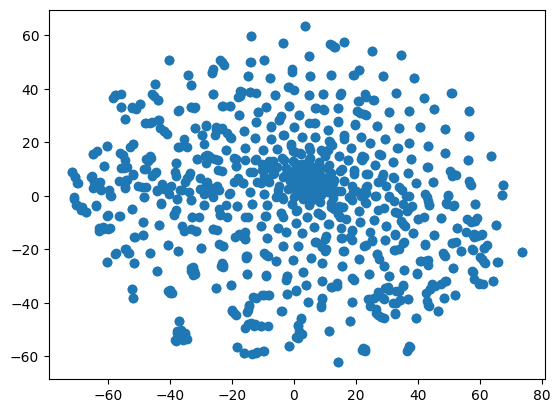

In [9]:
from analysis import *

reduced_states, _ = reduce_latent_states(latent_states, sample_rate=1) 
# Plot the reduced_states as a scatter plot

plt.scatter(reduced_states[:, 0], reduced_states[:, 1])

In [9]:
import torch
from torch.utils.data import DataLoader
import numpy as np

data = np.array([
    [0.1, 7.4, 0],
    [-0.2, 5.3, 0],
    [0.2, 8.2, 1],
    [0.2, 7.7, 1]])
print(data)

loader = DataLoader(data, batch_size=2, shuffle=False)
batch = next(iter(loader))
print(batch)

from torch.nn.utils.rnn import pad_sequence #(1)

nlp_data = [
    {'tokenized_input': [1, 4, 5, 9, 3, 2],
     'label':0},
    {'tokenized_input': [1, 7, 3, 14, 48, 7, 23, 154, 2],
     'label':0},
    {'tokenized_input': [1, 30, 67, 117, 21, 15, 2],
     'label':1},
    {'tokenized_input': [1, 17, 2],
     'label':0},
]

def custom_collate(data): #(2)
    inputs = [torch.tensor(d['tokenized_input']) for d in data] #(3)
    labels = [d['label'] for d in data]

    inputs = pad_sequence(inputs, batch_first=True) #(4)
    labels = torch.tensor(labels) #(5)

    return { #(6)
        'tokenized_input': inputs,
        'label': labels
    }

loader = DataLoader(nlp_data, batch_size=2, shuffle=False, collate_fn=custom_collate) #(7)

iter_loader = iter(loader)
batch1 = next(iter_loader)
print(batch1)
batch2 = next(iter_loader)
print(batch2)


[[ 0.1  7.4  0. ]
 [-0.2  5.3  0. ]
 [ 0.2  8.2  1. ]
 [ 0.2  7.7  1. ]]
tensor([[ 0.1000,  7.4000,  0.0000],
        [-0.2000,  5.3000,  0.0000]], dtype=torch.float64)
{'tokenized_input': tensor([[  1,   4,   5,   9,   3,   2,   0,   0,   0],
        [  1,   7,   3,  14,  48,   7,  23, 154,   2]]), 'label': tensor([0, 0])}
{'tokenized_input': tensor([[  1,  30,  67, 117,  21,  15,   2],
        [  1,  17,   2,   0,   0,   0,   0]]), 'label': tensor([1, 0])}


In [3]:
import torch
from torch.utils.data import Dataset
import pandas as pd

class MaskedDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe
        # Group the dataset by maskA and maskB
        self.grouped_data = dataframe.groupby('maskA')
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'idA': row['idA'],
            'A': row['A'],
            'maskA': row['maskA'],
            'idB': row['idB'],
            'B': row['B'],
            'maskB': row['maskB']
        }

    def get_grouped_data(self):
        return self.grouped_data
import numpy as np
from torch.utils.data import Sampler

class NegativeSampler(Sampler):
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size
        self.grouped_data = dataset.get_grouped_data()
    
    def __iter__(self):
        # Shuffle the rows within each mask group
        indices = []
        for mask, group in self.grouped_data:
            group_indices = list(group.index)
            np.random.shuffle(group_indices)
            indices.extend(group_indices)
        
        # Form batches by ensuring rows come from different mask groups
        for i in range(0, len(indices), self.batch_size):
            batch_indices = indices[i:i + self.batch_size]
            if len(batch_indices) == self.batch_size:
                yield batch_indices
    
    def __len__(self):
        return len(self.dataset) // self.batch_size
from torch.utils.data import DataLoader

# Custom collate function just for bundling data into tensors
def simple_collate_fn(batch):
    A = [item['A'] for item in batch]
    B = [item['B'] for item in batch]
    maskA = [item['maskA'] for item in batch]
    maskB = [item['maskB'] for item in batch]
    
    A_batch = torch.tensor(A)
    B_batch = torch.tensor(B)
    maskA_batch = torch.tensor(maskA)
    maskB_batch = torch.tensor(maskB)
    
    return A_batch, B_batch, maskA_batch, maskB_batch

# Example data
data = {
    'idA': [1, 2, 3, 4],
    'A': [101, 102, 103, 104],
    'maskA': [1, 1, 2, 2],
    'idB': [11, 12, 13, 14],
    'B': [201, 202, 203, 204],
    'maskB': [1, 1, 2, 3]
}
df = pd.DataFrame(data)

# Create the dataset
dataset = MaskedDataset(df)

# Create a DataLoader with custom sampler and collate function
sampler = NegativeSampler(dataset, batch_size=2)
dataloader = DataLoader(dataset, batch_sampler=sampler, collate_fn=simple_collate_fn)

# Test the DataLoader
for batch in dataloader:
    A_batch, B_batch, maskA_batch, maskB_batch = batch
    print("A_batch:", A_batch)
    print("B_batch:", B_batch)
    print("maskA_batch:", maskA_batch)
    print("maskB_batch:", maskB_batch)


A_batch: tensor([101, 102])
B_batch: tensor([201, 202])
maskA_batch: tensor([1, 1])
maskB_batch: tensor([1, 1])
A_batch: tensor([104, 103])
B_batch: tensor([204, 203])
maskA_batch: tensor([2, 2])
maskB_batch: tensor([3, 2])


In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model
model_name = "Salesforce/codet5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Input with explicit prompt and task label
input_code = "Generate code: def calculate_sum(a, b):\n    # Calculate and return the sum of two numbers\n    return"
inputs = tokenizer.encode(input_code, return_tensors="pt")

# Generate output with adjusted parameters
outputs = model.generate(
    inputs,
    max_length=150,
    do_sample=True,
    top_p=0.95,
    temperature=0.9,
    num_return_sequences=1
)

generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Generated Code:\n", generated_code)


Generated Code:
  " calculate_sum(a, b)"''

 def calculate_sum(a, b):
    """ calculate_sum(a, b): calculate_sum(a, b)"""


 def calculate_sum(a, b):
    #
    # the two
    #

    # # of #


    #

 # #
 """:: #
